In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from dataprocess import DataLoader, Blurr, Add_noise
from estimator import Estimator
from posttreat import Display
from posttreat import Error_Display

In [2]:
import os
from PIL import Image
from scipy import signal
from scipy import interpolate

In [3]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
# Taille de l'image
print("Taille de l'image :")
x_i.shape

Taille de l'image :


(600, 800)

2D Gaussian-like array:


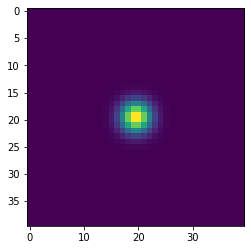

In [4]:
M         = 20
Nx, Ny    = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d         = np.sqrt(Nx*Nx+Ny*Ny)
sigma, mu = 0.1, 0.0
K         = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
K         = K/K.sum()
print("2D Gaussian-like array:")
plt.imshow(K)

In [5]:
x_b = Blurr(x_i,K)
x_o1 = Add_noise(x_b)
x_o2 = Add_noise(x_b, noise_level = 0.1)

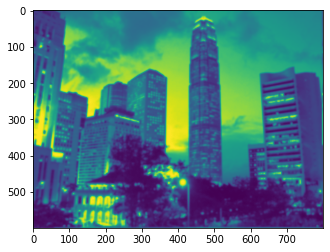

In [6]:
plt.imshow(x_b)

### Image reconstruction

In [7]:
from estimator import Estimator_TV
alpha = 1
mu    = 1
x_r = Estimator_TV(x_b,K,alpha,mu,niter = 500)

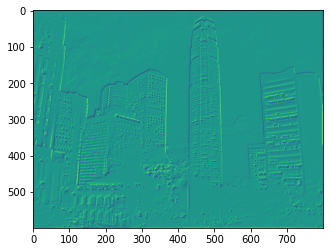

In [11]:
plt.imshow(x_b-x_i)